<a href="https://colab.research.google.com/github/colaprograms/2019-hackathon-ocr-wymbah/blob/master/notebooks/beamtst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook gives you some examples of how to use the model, like:

* testing its accuracy on the holdout set.
* running the model on an image file.

In [6]:
import torch, os
import numpy as np
from importlib import reload

if os.path.exists("/content"):
    print("We're on Google Colab!")
    os.chdir("/content")
    #if not os.path.exists("/content/AI4Good---Meza-OCR-Challenge"):
    #  !git clone https://github.com/Charitable-Analytics-International/AI4Good---Meza-OCR-Challenge
    if not os.path.exists("/content/2019-hackathon-ocr-wymbah"):
      !git clone https://github.com/colaprograms/2019-hackathon-ocr-wymbah
    os.chdir("/content/2019-hackathon-ocr-wymbah")
    !git pull
else:
    print("We're on Jupyter!")
    if os.path.exists("../notebooks"):
        os.chdir("..")

import nets.ctcnet
reload(nets.ctcnet)
from nets.ctcnet import *

import util.beam
reload(util.beam)
from util.beam import BeamSearch

import util.file
reload(util.file)
from util.file import FileHolder, file_list_to_tensor
fh = FileHolder()

import util.beamtest
reload(util.beamtest)

from util.chars import chars, nchars, idx

We're on Google Colab!
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 1 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/colaprograms/2019-hackathon-ocr-wymbah
   0d4b1d9..1287341  master     -> origin/master
Updating 0d4b1d9..1287341
Fast-forward
 util/beamtest.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)
Using images in images/


We try to decode a few images from the validation set.
*** Using checkpoint 0: checkpoint-0049-0.49-CTCModel
Guess: 95.6
Top 3 guesses:
    95.6 (probability = 0.9799)
    93.6 (probability = 0.0064)
    85.6 (probability = 0.0045)
Image:


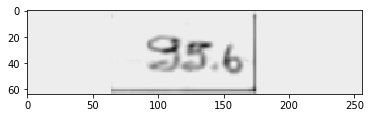

*** Using checkpoint 1: checkpoint-0046-0.43-CTCModel
Guess: 95.6
Top 3 guesses:
    95.6 (probability = 0.9922)
    95,6 (probability = 0.0054)
    956 (probability = 0.0020)
Image:


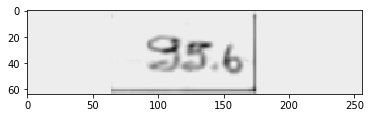

*** Using checkpoint 2: checkpoint-0079-0.42-CTCModel
Guess: 95.6
Top 3 guesses:
    95.6 (probability = 0.9926)
    95,6 (probability = 0.0033)
    85.6 (probability = 0.0028)
Image:


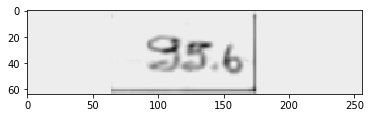

That worked great!


In [12]:
print("We try to decode a few images from the validation set.")

def decode_one_image(test, filename):
    inputs, answer = test.classify_files([filename])
    print("Guess:", answer[0].str())
    print("Top 3 guesses:")
    for z in answer[:3]:
        print("    %s (probability = %.4f)" % (z.str(), np.exp(z.p)))
    print("Image:")
    util.beamtest.show(inputs[0, :, :, :])

from util.beamtest import Test, CHECKPOINTS
print("*** Using checkpoint 0:", CHECKPOINTS[0])
t1 = Test(CHECKPOINTS[0], True)
decode_one_image(t1, "images/cell_images/validation_set/291.jpg")

print("*** Using checkpoint 1:", CHECKPOINTS[1])
t2 = Test(CHECKPOINTS[1], True)
decode_one_image(t2, "images/cell_images/validation_set/291.jpg")

print("*** Using checkpoint 2:", CHECKPOINTS[2])
t3 = Test(CHECKPOINTS[2], True)
decode_one_image(t3, "images/cell_images/validation_set/291.jpg")
print("That worked great!")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Let's try it again!
*** Using checkpoint 0: checkpoint-0049-0.49-CTCModel
Guess: 1.95
Top 3 guesses:
    1.95 (probability = 0.7949)
    11.95 (probability = 0.0988)
    195 (probability = 0.0357)
Image:


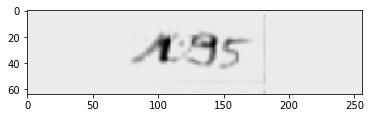

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


*** Using checkpoint 1: checkpoint-0046-0.43-CTCModel
Guess: 195
Top 3 guesses:
    195 (probability = 0.9939)
    19,5 (probability = 0.0010)
    19.5 (probability = 0.0005)
Image:


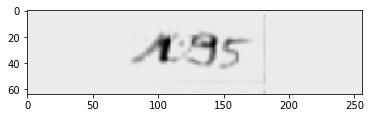

*** Using checkpoint 2: checkpoint-0079-0.42-CTCModel


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Guess: 195
Top 3 guesses:
    195 (probability = 0.9035)
    1.95 (probability = 0.0873)
    1295 (probability = 0.0062)
Image:


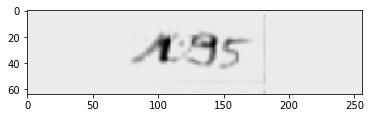

That did not go so well. Oh well, those are the breaks.

This is a hint that we shouldn't take the probabilities too seriously,
since the first model predicted 1.95 with probability 0.79, and
the second one predicted 195 with probability 0.99.


In [9]:
print("Let's try it again!")
print("*** Using checkpoint 0:", CHECKPOINTS[0])
decode_one_image(t1, "images/cell_images/validation_set/296.jpg")
print("*** Using checkpoint 1:", CHECKPOINTS[1])
decode_one_image(t2, "images/cell_images/validation_set/296.jpg")
print("*** Using checkpoint 2:", CHECKPOINTS[2])
decode_one_image(t3, "images/cell_images/validation_set/296.jpg")
print("That did not go so well. Oh well, those are the breaks.")
print()
print("This is a hint that we shouldn't take the probabilities too seriously,")
print("since the first model predicted 1.95 with probability 0.79, and")
print("the second one predicted 195 with probability 0.99.")

In [10]:
print("""Testing the checkpoints on our holdout set.
(This is probably too optimistic since we used the holdout set to choose these checkpoints.)
""")

print("Checkpoint 0:", util.beamtest.CHECKPOINTS[0])
result = util.beamtest.test(util.beamtest.CHECKPOINTS[0], quiet=True)
print(result)
print()
print("Checkpoint 1:", util.beamtest.CHECKPOINTS[1])
result = util.beamtest.test(util.beamtest.CHECKPOINTS[1], quiet=True)
print(result)
print()
print("Checkpoint 2:", util.beamtest.CHECKPOINTS[2])
result = util.beamtest.test(util.beamtest.CHECKPOINTS[2], quiet=True)
print(result)

Testing the checkpoints on our holdout set.
(This is probably too optimistic since we used the holdout set to choose these checkpoints.)

Checkpoint 0: checkpoint-0049-0.49-CTCModel
Testing 750 images
Tested  64/750. 92.19% correct
Tested 128/750. 93.75% correct
Tested 192/750. 90.62% correct
Tested 256/750. 92.19% correct
Tested 320/750. 92.19% correct
Tested 384/750. 92.19% correct
Tested 448/750. 91.74% correct
Tested 512/750. 91.80% correct
Tested 576/750. 90.80% correct
Tested 640/750. 90.94% correct
Tested 704/750. 90.77% correct
Tested 750/750. 90.80% correct
Total correct: 90.80% (681/750)

Checkpoint 1: checkpoint-0046-0.43-CTCModel
Testing 750 images
Tested  64/750. 90.62% correct
Tested 128/750. 90.62% correct
Tested 192/750. 89.06% correct
Tested 256/750. 91.41% correct
Tested 320/750. 92.19% correct
Tested 384/750. 92.97% correct
Tested 448/750. 92.41% correct
Tested 512/750. 92.77% correct
Tested 576/750. 92.53% correct
Tested 640/750. 92.81% correct
Tested 704/750. 92.61